# ViT-B/16 

- **Goal:** Fine-tune **Vision Transformer B/16** on 224×224 `ImageFolder` data; evaluate with **AUC + ROC** and training curves.
- **Data/Transforms:** `preprocessed224_best/<class_name>/*`; `ToTensor` + ImageNet **Normalize** (resize commented; already 224×224).
- **Split:** Stratified **80/10/10** (train/val/test) via `StratifiedShuffleSplit` (no oversampling).
- **Model:**  
  - Uses **timm** if available: `timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=K)`  
  - Else **torchvision**: `models.vit_b_16(weights=DEFAULT)` with head replaced to `Linear(..., K)`.
- **Train:** **CrossEntropy (label_smoothing=0.1)**, **AdamW (lr=5e-5, weight_decay=0.05)**, **AMP** (`torch.amp.autocast` + `GradScaler`), `ReduceLROnPlateau` on **val acc**; logs train/val **loss** & **acc**.
- **Checkpoint:** Best by val acc → `checkpoints/vit_b16_best.pth` (weights, `epoch`, `val_acc`, `classes`, `backend`).
- **Evaluate:** `classification_report`, **confusion matrix**, **per-class ROC**, **AUC OVR** (macro/weighted/micro) with safe handling for missing classes.
- **Plots:** Confusion matrix, ROC curves, and train/val **accuracy** & **loss** curves.


Device: cuda | Backend: timm
Classes: ['ARMD', 'cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
Train: 3782 | Val: 473 | Test: 473


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

C:\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\HP\.cache\huggingface\hub\models--timm--vit_base_patch16_224.augreg2_in21k_ft_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Epoch 1/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:19<00:00,  1

✅ Epoch 1: train_acc=0.7909 val_acc=0.9027 | train_loss=0.8060 val_loss=0.6043
💾 Saved best model → checkpoints\vit_b16_best.pth


Epoch 2/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:22<00:00,  1.48s/it]


✅ Epoch 2: train_acc=0.9276 val_acc=0.8922 | train_loss=0.5443 val_loss=0.6101


Epoch 3/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.21s/it]


✅ Epoch 3: train_acc=0.9662 val_acc=0.8922 | train_loss=0.4631 val_loss=0.6161


Epoch 4/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.15s/it]


✅ Epoch 4: train_acc=0.9828 val_acc=0.9133 | train_loss=0.4367 val_loss=0.5919
💾 Saved best model → checkpoints\vit_b16_best.pth


Epoch 5/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.16s/it]


✅ Epoch 5: train_acc=0.9913 val_acc=0.9281 | train_loss=0.4139 val_loss=0.5786
💾 Saved best model → checkpoints\vit_b16_best.pth


Epoch 6/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.23s/it]


✅ Epoch 6: train_acc=0.9881 val_acc=0.9006 | train_loss=0.4191 val_loss=0.6803


Epoch 7/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.25s/it]


✅ Epoch 7: train_acc=0.9881 val_acc=0.9260 | train_loss=0.4196 val_loss=0.5636


Epoch 8/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:18<00:00,  1.24s/it]


✅ Epoch 8: train_acc=0.9937 val_acc=0.9218 | train_loss=0.4063 val_loss=0.5811


Epoch 9/12 [Val]: 100%|████████████████████████████████████████████████████████████████| 15/15 [00:20<00:00,  1.38s/it]


✅ Epoch 9: train_acc=0.9974 val_acc=0.9133 | train_loss=0.3958 val_loss=0.5938


Epoch 10/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:36<00:00,  2.43s/it]


✅ Epoch 10: train_acc=0.9989 val_acc=0.9154 | train_loss=0.3923 val_loss=0.5845


Epoch 11/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:32<00:00,  2.18s/it]


✅ Epoch 11: train_acc=0.9992 val_acc=0.9175 | train_loss=0.3910 val_loss=0.5822


Epoch 12/12 [Val]: 100%|███████████████████████████████████████████████████████████████| 15/15 [00:43<00:00,  2.88s/it]


✅ Epoch 12: train_acc=0.9995 val_acc=0.9175 | train_loss=0.3909 val_loss=0.5810

=== TEST EVALUATION (ViT-B/16) ===


Test: 100%|████████████████████████████████████████████████████████████████████████████| 15/15 [00:40<00:00,  2.70s/it]



Classification Report (Test):
                      precision    recall  f1-score   support

                ARMD     1.0000    1.0000    1.0000        51
            cataract     0.9293    0.8846    0.9064       104
diabetic_retinopathy     1.0000    1.0000    1.0000       110
            glaucoma     0.8333    0.7921    0.8122       101
              normal     0.8462    0.9252    0.8839       107

            accuracy                         0.9133       473
           macro avg     0.9218    0.9204    0.9205       473
        weighted avg     0.9141    0.9133    0.9131       473



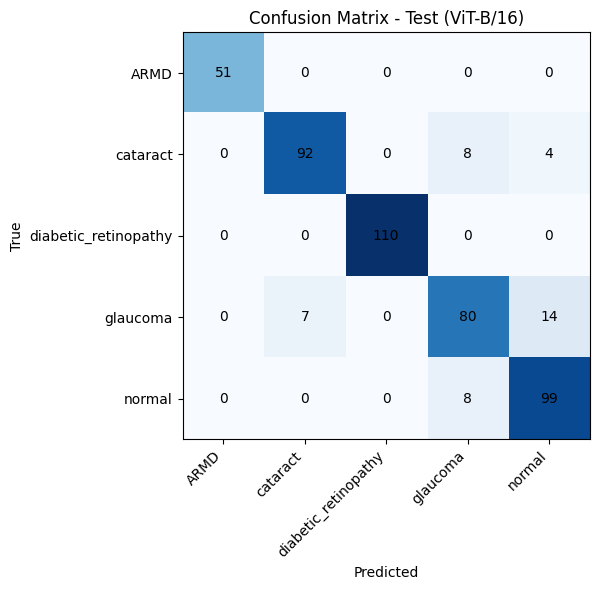


AUC (macro-OVR):    0.9804
AUC (weighted-OVR): 0.9786
AUC (micro-OVR):    0.9815


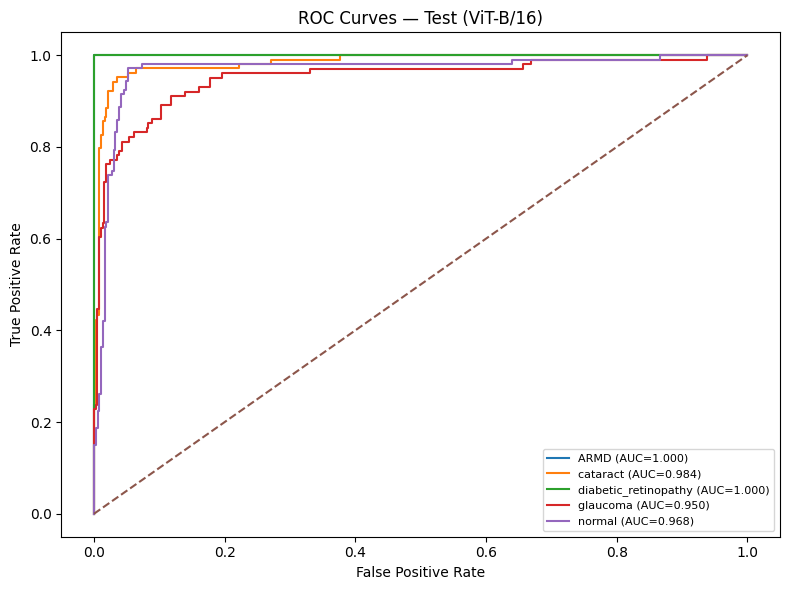

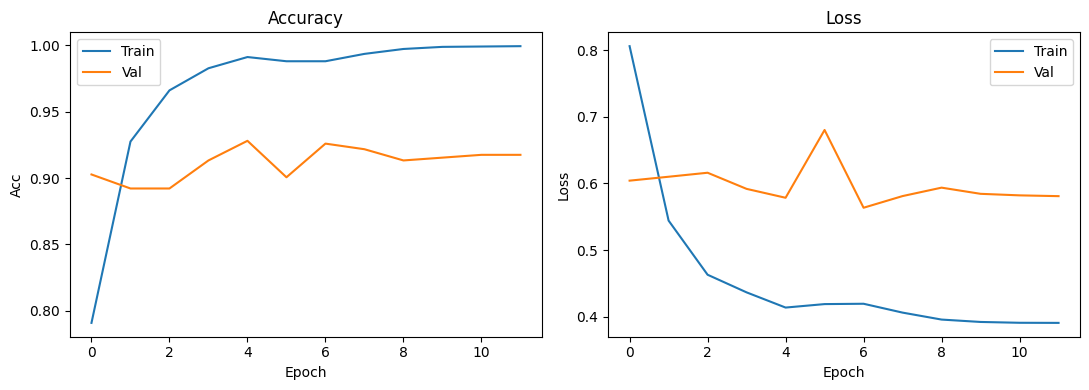

In [1]:
import os, random
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Subset
from torchvision import models, transforms, datasets

# ========= CONFIG =========
DATA_ROOT   = r"preprocessed224_best"     # 224×224 preprocessed folder (class subfolders)
BATCH_SIZE  = 32
EPOCHS      = 12
LR          = 5e-5                        # ViT fine-tune LR (AdamW)
WEIGHT_DECAY= 0.05                        # AdamW weight decay (works well for ViT)
NUM_WORKERS = 2
SAVE_DIR    = "checkpoints"
CKPT_NAME   = "vit_b16_best.pth"
SEED        = 42
# ==========================

# Try timm; fall back to torchvision
_USE_TIMM = False
try:
    import timm
    _USE_TIMM = True
except Exception:
    _USE_TIMM = False

os.makedirs(SAVE_DIR, exist_ok=True)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device, "| Backend:", "timm" if _USE_TIMM else "torchvision")

# Repro
random.seed(SEED); np.random.seed(SEED)
torch.manual_seed(SEED); torch.cuda.manual_seed_all(SEED)
torch.backends.cudnn.benchmark = True

# ---- Dataset & transforms (already 224×224) ----
norm_tfms = transforms.Compose([
    # If your data isn't 224 yet, uncomment:
    # transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
base_ds = datasets.ImageFolder(root=DATA_ROOT, transform=norm_tfms)
num_classes = len(base_ds.classes)
print("Classes:", base_ds.classes)

targets = np.array(base_ds.targets)
indices = np.arange(len(base_ds))

# ---- 80/10/10 split (stratified) ----
sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=SEED)  # 80/20
train_idx, temp_idx = next(sss1.split(indices, targets))
temp_targets = targets[temp_idx]
sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=SEED)  # 10/10 from temp
val_rel, test_rel = next(sss2.split(np.arange(len(temp_idx)), temp_targets))
val_idx, test_idx = temp_idx[val_rel], temp_idx[test_rel]

train_ds = Subset(base_ds, train_idx)
val_ds   = Subset(base_ds, val_idx)
test_ds  = Subset(base_ds, test_idx)

pin = torch.cuda.is_available()
train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True,
                          num_workers=NUM_WORKERS, pin_memory=pin)
val_loader   = DataLoader(val_ds,   batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)
test_loader  = DataLoader(test_ds,  batch_size=BATCH_SIZE, shuffle=False,
                          num_workers=NUM_WORKERS, pin_memory=pin)

print(f"Train: {len(train_ds)} | Val: {len(val_ds)} | Test: {len(test_ds)}")

# ---- Model: ViT-B/16 ----
def get_vit_b16(num_classes):
    if _USE_TIMM:
        # timm replaces classifier automatically with num_classes
        model = timm.create_model("vit_base_patch16_224", pretrained=True, num_classes=num_classes)
    else:
        # torchvision fallback
        model = models.vit_b_16(weights=models.ViT_B_16_Weights.DEFAULT)
        # replace head
        if hasattr(model.heads, "head"):
            in_feats = model.heads.head.in_features
            model.heads.head = nn.Linear(in_feats, num_classes)
        else:
            # generic last layer swap if API differs
            for name, module in reversed(list(model.heads.named_modules())):
                if isinstance(module, nn.Linear):
                    in_feats = module.in_features
                    setattr(model.heads, name, nn.Linear(in_feats, num_classes))
                    break
    return model

model = get_vit_b16(num_classes).to(device)

# ---- Loss / Optim / Sched / AMP ----
criterion = nn.CrossEntropyLoss(label_smoothing=0.1)  # mild smoothing helps ViT
optimizer = torch.optim.AdamW(model.parameters(), lr=LR, weight_decay=WEIGHT_DECAY)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="max", factor=0.5, patience=2)
scaler = torch.amp.GradScaler("cuda", enabled=torch.cuda.is_available())

# ---- Train ----
best_val_acc = 0.0
history = {"train_loss":[], "val_loss":[], "train_acc":[], "val_acc":[]}

for epoch in range(1, EPOCHS+1):
    # train
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    for imgs, labels in tqdm(train_loader, desc=f"Epoch {epoch}/{EPOCHS} [Train]"):
        imgs, labels = imgs.to(device), labels.to(device)
        optimizer.zero_grad(set_to_none=True)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            loss = criterion(logits, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        running_loss += loss.item()
        preds = logits.argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    train_loss = running_loss / max(1, len(train_loader))
    train_acc  = correct / max(1, total)

    # validate
    model.eval()
    v_loss, v_correct, v_total = 0.0, 0, 0
    all_probs = []
    with torch.no_grad():
        for imgs, labels in tqdm(val_loader, desc=f"Epoch {epoch}/{EPOCHS} [Val]"):
            imgs, labels = imgs.to(device), labels.to(device)
            with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
                logits = model(imgs)
                loss = criterion(logits, labels)
                probs = torch.softmax(logits, dim=1)

            v_loss += loss.item()
            preds = logits.argmax(1)
            v_correct += (preds == labels).sum().item()
            v_total += labels.size(0)
            all_probs.extend(probs.detach().cpu().numpy())

    val_loss = v_loss / max(1, len(val_loader))
    val_acc  = v_correct / max(1, v_total)

    history["train_loss"].append(train_loss); history["val_loss"].append(val_loss)
    history["train_acc"].append(train_acc);   history["val_acc"].append(val_acc)

    print(f"✅ Epoch {epoch}: train_acc={train_acc:.4f} val_acc={val_acc:.4f} | "
          f"train_loss={train_loss:.4f} val_loss={val_loss:.4f}")

    scheduler.step(val_acc)

    # save best by val acc
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        ckpt_path = os.path.join(SAVE_DIR, CKPT_NAME)
        torch.save({
            "model_state": model.state_dict(),
            "val_acc": best_val_acc,
            "epoch": epoch,
            "classes": base_ds.classes,
            "backend": "timm" if _USE_TIMM else "torchvision"
        }, ckpt_path)
        print(f"💾 Saved best model → {ckpt_path}")

# ---- Final Test Evaluation ----
print("\n=== TEST EVALUATION (ViT-B/16) ===")
model.eval()
test_preds, test_labels, test_probs = [], [], []
with torch.no_grad():
    for imgs, labels in tqdm(test_loader, desc="Test"):
        imgs, labels = imgs.to(device), labels.to(device)
        with torch.amp.autocast("cuda", enabled=torch.cuda.is_available()):
            logits = model(imgs)
            probs = torch.softmax(logits, dim=1)
        preds = logits.argmax(1)

        test_preds.extend(preds.cpu().numpy())
        test_labels.extend(labels.cpu().numpy())
        test_probs.extend(probs.cpu().numpy())

print("\nClassification Report (Test):")
print(classification_report(test_labels, test_preds, digits=4, target_names=base_ds.classes))

cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix - Test (ViT-B/16)")
plt.xlabel("Predicted"); plt.ylabel("True")
for (i,j),v in np.ndenumerate(cm):
    plt.text(j, i, str(v), ha='center', va='center')
plt.xticks(ticks=np.arange(num_classes), labels=base_ds.classes, rotation=45, ha="right")
plt.yticks(ticks=np.arange(num_classes), labels=base_ds.classes)
plt.tight_layout(); plt.show()

# ---- AUC + ROC ----
classes = list(range(num_classes))
y_true_bin = label_binarize(np.array(test_labels), classes=classes)
y_score = np.array(test_probs)
present_classes = np.unique(test_labels)
present_mask = np.isin(classes, present_classes)

def safe_auc(y_true, y_score, **kwargs):
    try:
        return roc_auc_score(y_true, y_score, **kwargs)
    except ValueError:
        return float("nan")

print(f"\nAUC (macro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='macro',    multi_class='ovr'):.4f}")
print(f"AUC (weighted-OVR): {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='weighted', multi_class='ovr'):.4f}")
print(f"AUC (micro-OVR):    {safe_auc(y_true_bin[:,present_mask], y_score[:,present_mask], average='micro',    multi_class='ovr'):.4f}")

plt.figure(figsize=(8,6))
for c in present_classes:
    fpr, tpr, _ = roc_curve(y_true_bin[:, c], y_score[:, c])
    class_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{base_ds.classes[c]} (AUC={class_auc:.3f})")
plt.plot([0,1],[0,1],'--')
plt.title("ROC Curves — Test (ViT-B/16)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.legend(fontsize=8); plt.tight_layout(); plt.show()

# ---- Train/Val curves ----
plt.figure(figsize=(11,4))
plt.subplot(1,2,1)
plt.plot(history["train_acc"], label="Train")
plt.plot(history["val_acc"],   label="Val")
plt.title("Accuracy"); plt.xlabel("Epoch"); plt.ylabel("Acc"); plt.legend()
plt.subplot(1,2,2)
plt.plot(history["train_loss"], label="Train")
plt.plot(history["val_loss"],   label="Val")
plt.title("Loss"); plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend()
plt.tight_layout(); plt.show()
